In [47]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [48]:
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/15/1481815509.h5'

In [49]:
h = katdal.open(filename)

In [50]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/15/1481815509.h5 (version 3.0)
Observer: Simphiwe  Experiment ID: 20161215-0059
Description: 'Generic Phaseup for all targets'
Observed from 2016-12-15 17:25:54.081 SAST to 2016-12-15 17:30:05.974 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m006,m007,m008,m010,m014,m015,m021,m022,m025,m031,m062,m063  24      312
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m008', 'm010', 'm007', 'm014', 'm006', 'm063', 'm015', 'm021', 'm022', 'm025', 'm031', 'm062']
  spw=0
-------------------------------------------------------------------------------
Shape: (63 dumps, 4096 chan

In [51]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  1
    cal_product_K  ---  1
    cal_product_G  ---  2


In [52]:
np.set_printoptions(precision=4,suppress=True)

In [53]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V162">
[['m006', 'm007', 'm008', 'm010', 'm014', 'm015', 'm021', 'm022', 'm025', 'm031', 'm062', 'm063']]
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031'
 'm062' 'm063']


# Delays

In [54]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [55]:
k_array.shape #Times,Pols,Antennas

(1, 2, 12)

In [56]:
# print delays (if there are few delays)
print 'POL 0: \n', k_0[0], "\n",k_0[-1]
print 'POL 1: \n', k_1[0],"\n" ,k_1[-1]

POL 0: 
[ 139.1905   42.1241  107.6369   14.957    81.8807  122.574   485.4966
  467.8722   -0.     -140.5337  106.7198  104.1275] 
[ 139.1905   42.1241  107.6369   14.957    81.8807  122.574   485.4966
  467.8722   -0.     -140.5337  106.7198  104.1275]
POL 1: 
[ 141.1116   40.3584  106.6584  107.2526   82.0427  120.8542  483.2259
  465.5732   -0.     -140.6611  101.4475   98.7109] 
[ 141.1116   40.3584  106.6584  107.2526   82.0427  120.8542  483.2259
  465.5732   -0.     -140.6611  101.4475   98.7109]


In [57]:
print labels

['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031'
 'm062' 'm063']


In [58]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

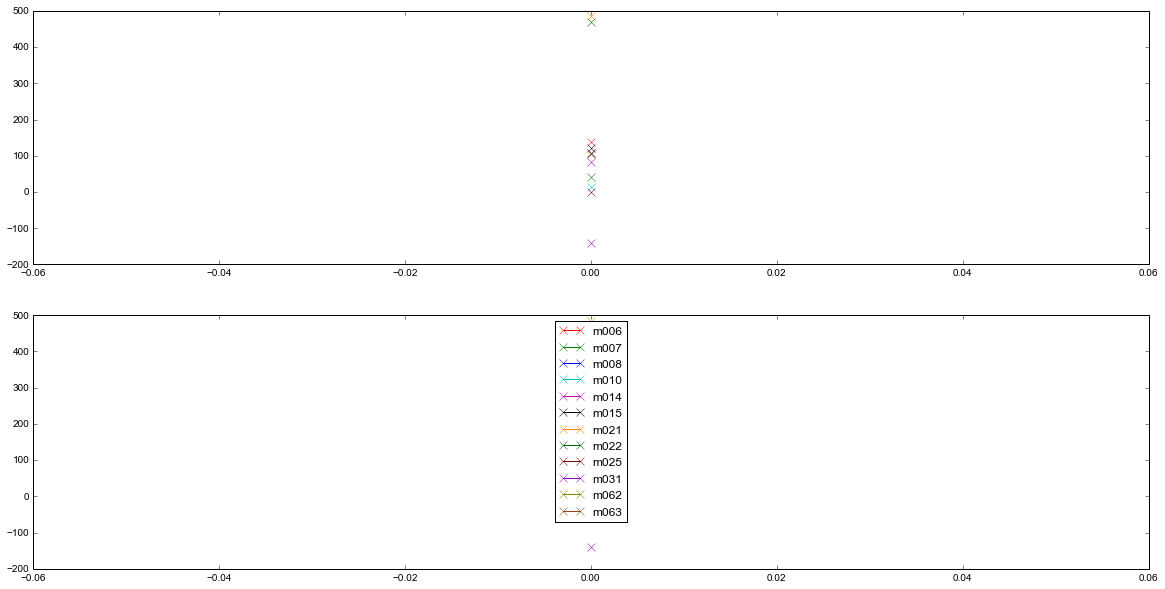

In [59]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')

# Gains

In [60]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(2, 2, 12)


In [61]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 0.9992  1.002   0.9998  1.0013  0.9992  1.0003  0.9993  1.0001  1.0005
  1.0009  1.0011  1.002 ]
[ 0.9985  1.0013  1.001   1.0013  0.9998  1.      0.9988  1.0007  0.9997
  1.0006  1.0012  1.0036]


In [62]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 0.9986  1.0007  0.9977  1.0023  1.0027  0.9976  0.9966  0.9981  0.9998
  1.0001  0.9975  0.9955]
[ 1.0003  1.0019  0.9986  1.0005  1.001   0.9996  0.9974  0.9998  0.9992
  0.9991  0.9955  0.9887]


In [63]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 0.9994  0.9987  0.9979  1.0009  1.0035  0.9973  0.9973  0.998   0.9993
  0.9992  0.9964  0.9936]
[ 1.0018  1.0006  0.9976  0.9991  1.0012  0.9996  0.9986  0.9992  0.9996
  0.9985  0.9943  0.9851]


In [64]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[  57.3417   69.689   133.4294   58.0222  142.1045   79.9885  120.3601
   67.9277   -0.      -13.8514  115.8707  -15.7258]
[  40.5693   95.8538  100.7889   70.8848   71.1169   60.5218  107.0404
   52.6632    0.       39.6722   47.3099   70.2098]


In [65]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[  57.7161   70.4728  133.8514   57.5877  141.1171   79.3808  120.7162
   69.2219    0.      -13.9343  116.3089  -15.1749]
[  40.8881   96.6884  101.2249   70.5253   70.1222   59.945   107.4587
   54.0389    0.       39.6002   47.7814   70.808 ]


In [66]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[ 0.3744  0.7838  0.422  -0.4346 -0.9875 -0.6076  0.3561  1.2943  0.
 -0.0829  0.4382  0.5508]
[ 0.3187  0.8345  0.4361 -0.3595 -0.9947 -0.5769  0.4183  1.3756  0.     -0.072
  0.4714  0.5982]


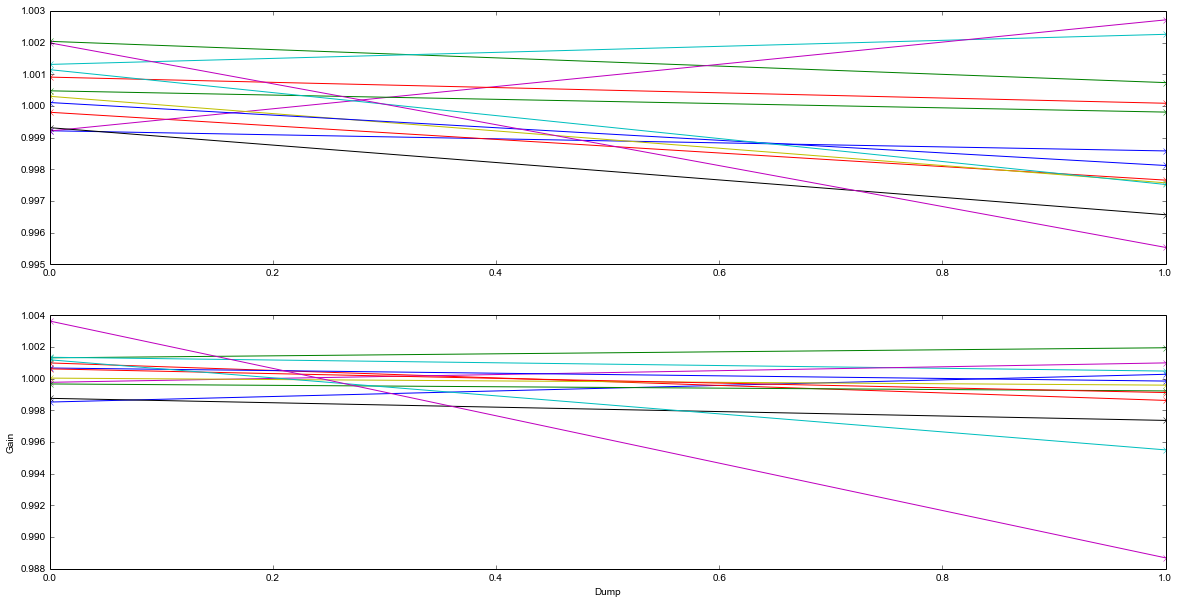

In [67]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

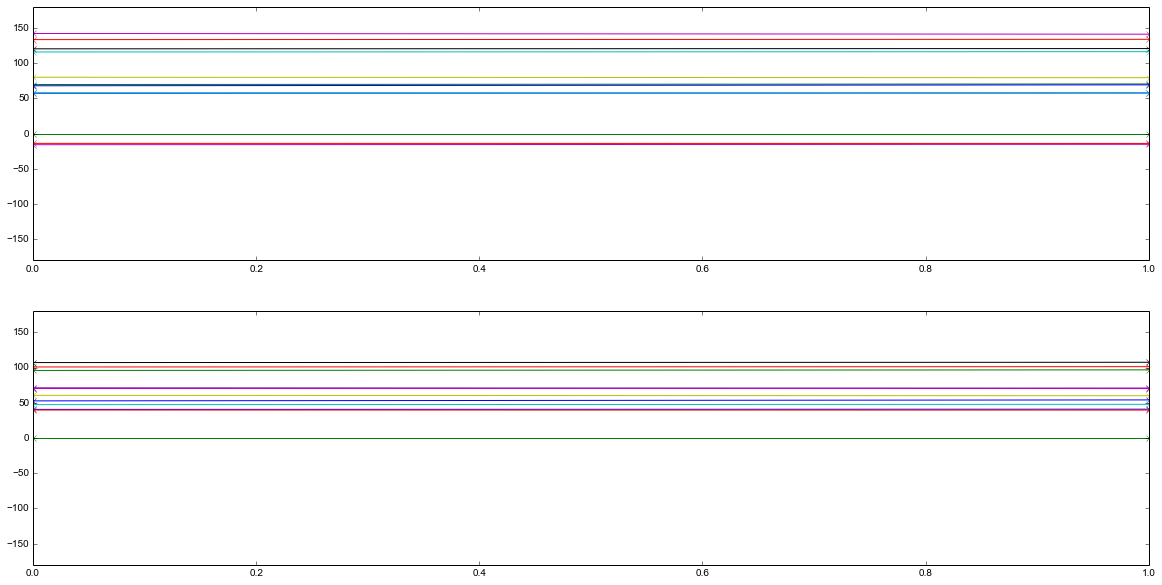

In [68]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [69]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(1, 4096, 2, 12)


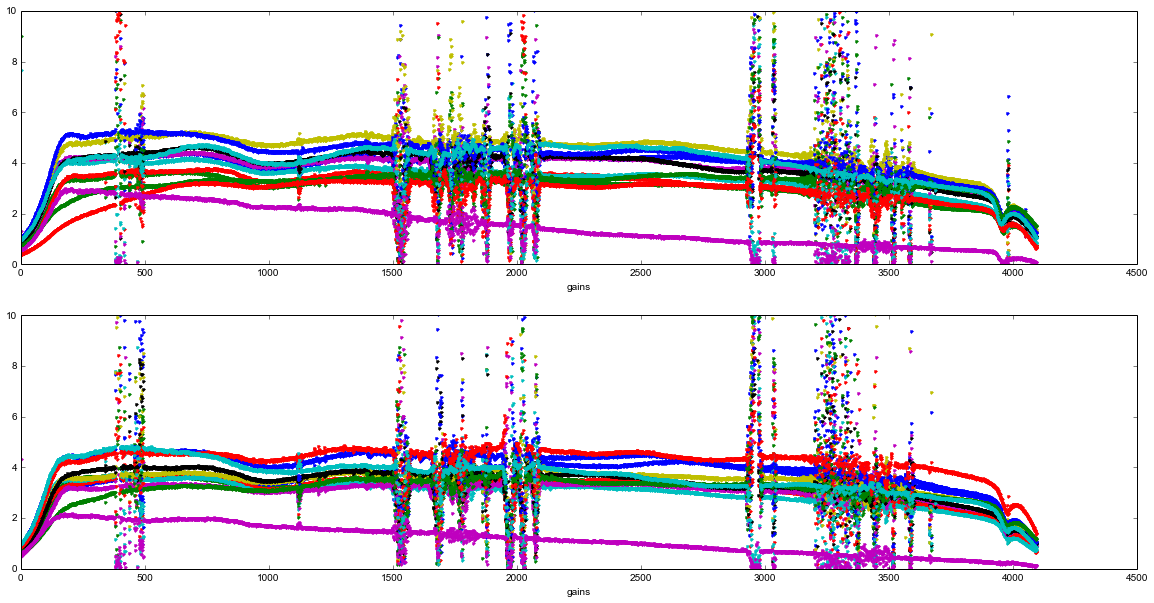

In [70]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

In [71]:
""""
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')
"""

'"\nfor i in range(len(labels)):\n    ax[0].plot(k_0[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[0].set_ylim([-0.2,0.2]);\n    ax[1].plot(k_1[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[1].set_ylim([-0.2,0.2]);\nplt.legend(loc=\'upper center\')\n'

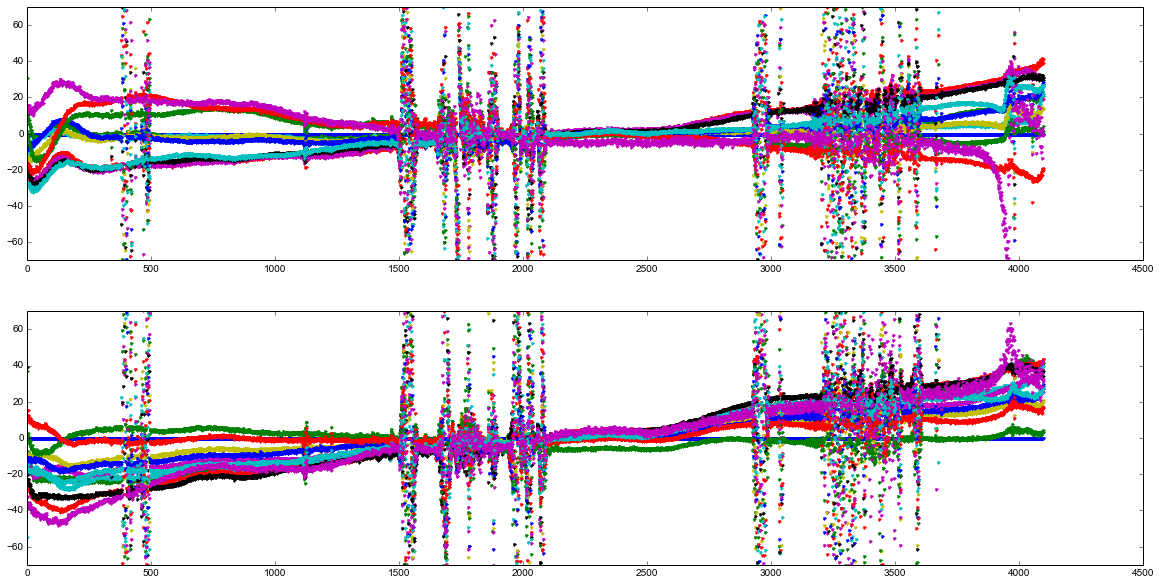

In [72]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].set_ylim([-70,70]);
ax[1].set_ylim([-70,70]);
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
plt.legend()

In [73]:
len(labels)

12

In [74]:
b_array.shape
# Time,channels,pols,antennas

(1, 4096, 2, 12)

In [75]:
#One bandpass at the END
antn=11
b_0_1 = b_array[-1,:,0,antn]
b_1_1 = b_array[-1,:,1,antn]
print b_1_1.shape
print a_array[:,antn]

(4096,)
['m063']


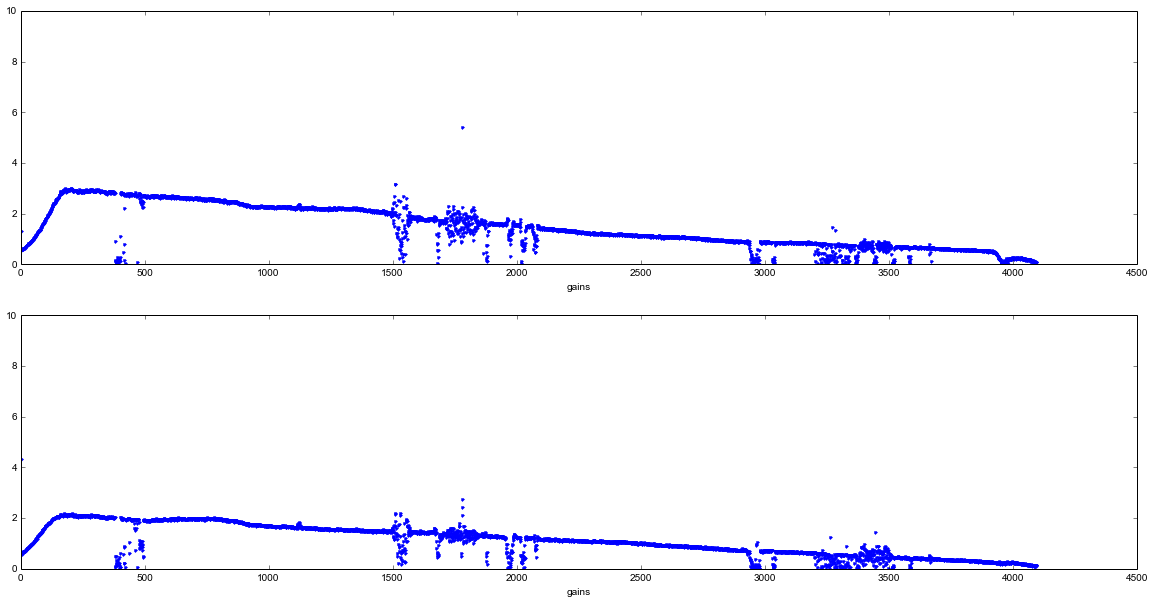

In [76]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

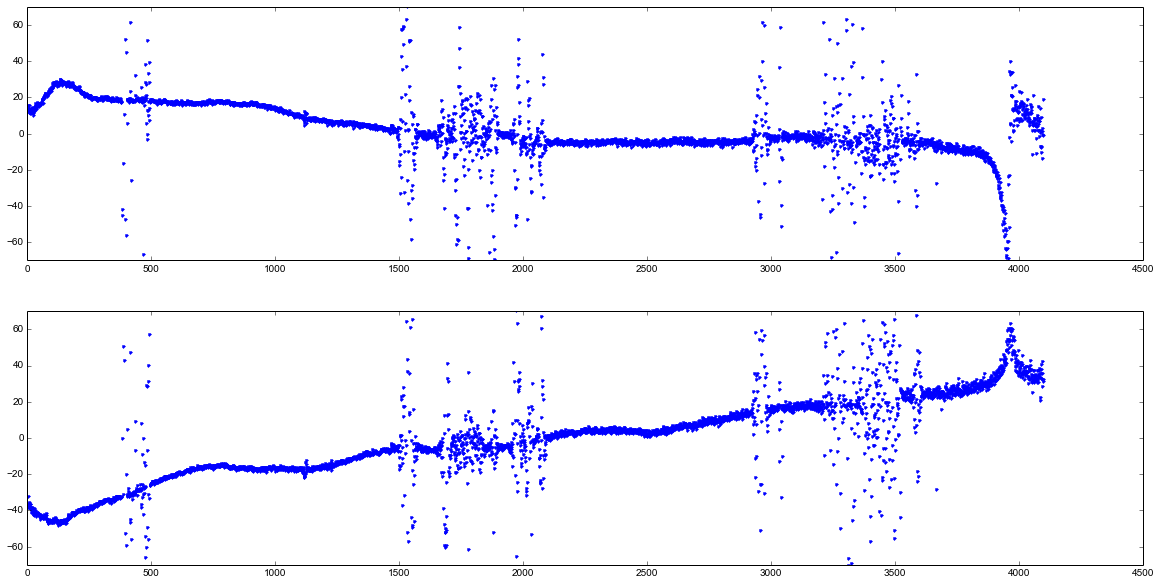

In [77]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);

In [78]:
str(h.catalogue.targets[0])

'PKS 1934-63 (J1939-6342), tags=radec bfcal single_accumulation, 19:39:25.03 -63:42:45.7, flux defined for 200 - 12000 MHz'

# M063 crazy solutions